# LINEAR TIME INVARIANT SYSTEMS

# Preliminaries

In [1]:
import controlSBML as ctl
import control
from controlSBML.util import makeSimulationTimes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import tellurium as te
print("controlSBML version: " + ctl.__version__)

controlSBML version: 1.1.01


# Models

## Linear model

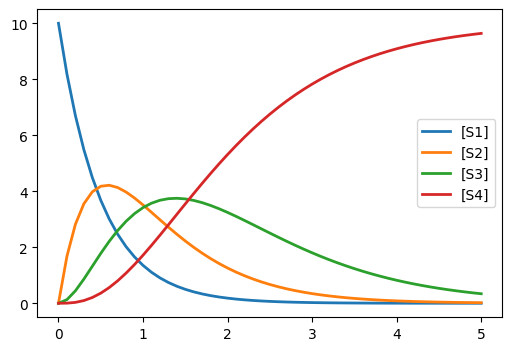

In [2]:
LINEAR_MDL = """
S1 -> S2; k1*S1
S2 -> S3; k2*S2
S3 -> S4; k3*S3

k1 = 2
k2 = 1.5
k3 = 1
S1 = 10
S2 = 0
S3 = 0
S4 = 0
"""
LINEAR_RR = te.loada(LINEAR_MDL)
LINEAR_DATA = LINEAR_RR.simulate()
LINEAR_DF = ctl.Timeseries(LINEAR_DATA, columns=LINEAR_DATA.colnames)
LINEAR_RR.plot(LINEAR_DATA)
LINEAR_STATE_NAMES = ["S1", "S2", "S3", "S4"]
LINEAR_PARAM_DCT = {"input_names": LINEAR_STATE_NAMES, "output_names": LINEAR_STATE_NAMES}

## WOLF model

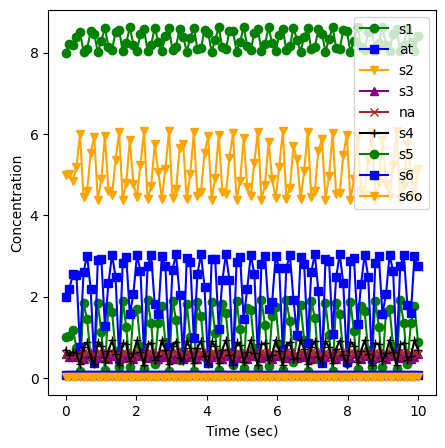

In [8]:
WOLF_CTLSB = ctl.ControlSBML("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000206.2?filename=BIOMD0000000206_url.xml", 
                        input_names=["at"], output_names=["s5"])
_ = WOLF_CTLSB.plotModel(times=np.linspace(0, 10, 100))

# LTI Basics

In [13]:
tf = control.TransferFunction([1], [1, 2, 4])
tf

TransferFunction(array([1]), array([1, 2, 4]))

In [14]:
tf.poles()

array([-1.+1.73205081j, -1.-1.73205081j])

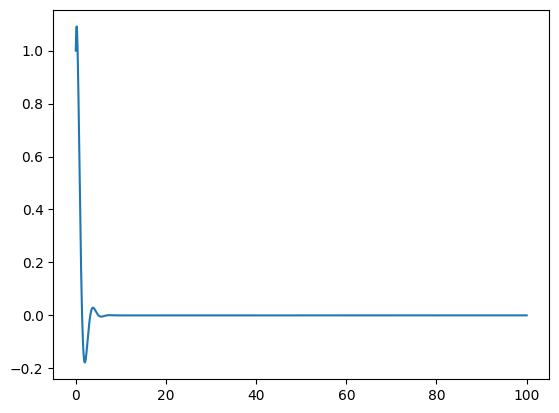

In [20]:
times = np.linspace(0, 100, 1000)
uv = np.repeat(0, len(times))
uv[0] = 1
_, yv = control.forced_response(tf, T=times, X0=1)
plt.plot(times, yv)

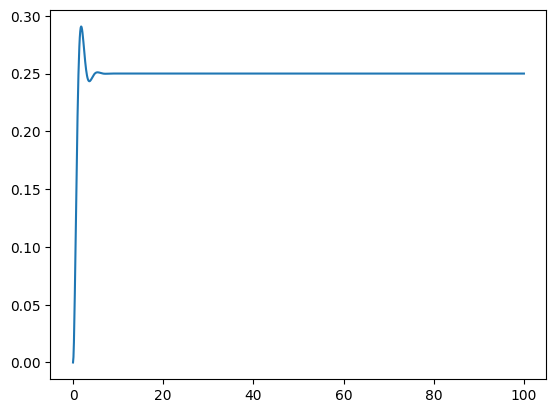

In [19]:
times = np.linspace(0, 100, 1000)
_, yv = control.step_response(tf, T=times)
plt.plot(times, yv)

In [18]:
tf.dcgain()

0.25

In [ ]:
def plotSignal(coefs, x0=1, end_time=100, points_per_time=10, ax=None):
    """
    Plots the signal for the given coefficients.
    """
    tf = control.TransferFunction([1], coefs)
    times = np.linspace(0, end_time, points_per_time*end_time)
    _, yv = control.forced_response(tf, T=times, X0=x0)
    # Plot
    if ax is None:
        _, ax = plt.subplots(1, figsize=(1,1))
    ax.plot(times, yv)
    ax.set_xlabel("time")
    ax.set_ylabel("y")
    #ax.set_title("coefs: %s" % str(coefs))
    return times, yv
    
# Tests
times, yv = plotSignal(np.repeat(1, 2), end_time=10)

In [ ]:
_ = plotSignal([1, -1], end_time=10)

In [ ]:
_ = plotSignal([1, 0], end_time=10)

In [ ]:
for coefs in [np.repeat(1, n) for n in range(2, 15)]:
    _ = plotSignal(coefs, end_time=10)

# Approximations with linear differential equations

In [ ]:
plt.plot(LINEAR_DF.index, LINEAR_DF["S2"])

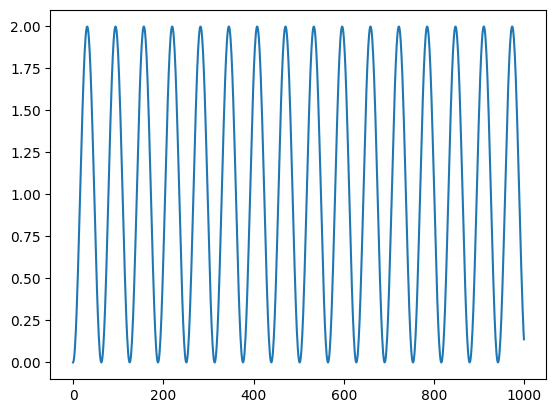

In [160]:
tf = control.TransferFunction([1], [1, 0, 1])
_, yv = control.step_response(tf, T=times)
plt.plot(range(len(yv)), yv)

In [161]:
tf.poles()

array([-0.+1.j,  0.-1.j])

# Evaluations in the s-plane

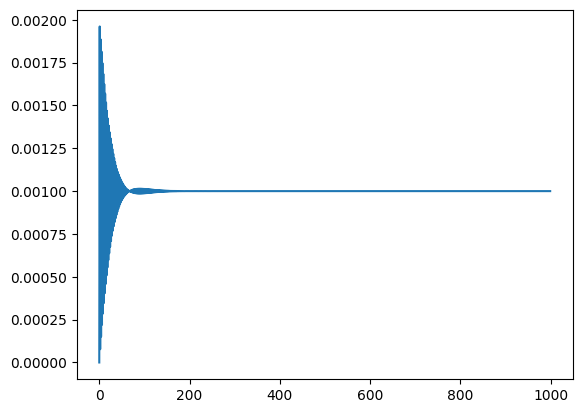

In [100]:
tf = control.TransferFunction([1], [1, 0.8, 1000])
uv = np.repeat(0, len(times))
_, yv = control.step_response(tf, T=times)
plt.plot(range(len(yv)), yv)

In [147]:
p = -1-2j
new_p = -np.real(p)+0j +1j*np.imag(p)
b_term = 2*np.real(new_p)
c_term = new_p*np.conj(new_p)
new_p, b_term, c_term

((1-2j), 2.0, (5+0j))

/var/folders/02/lb248q1j50dch2pthzkvxmpr0000gn/T/ipykernel_14429/2597349886.py:16: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/02/lb248q1j50dch2pthzkvxmpr0000gn/T/ipykernel_14429/2597349886.py:21: UserWarning:

FixedFormatter should only be used together with FixedLocator



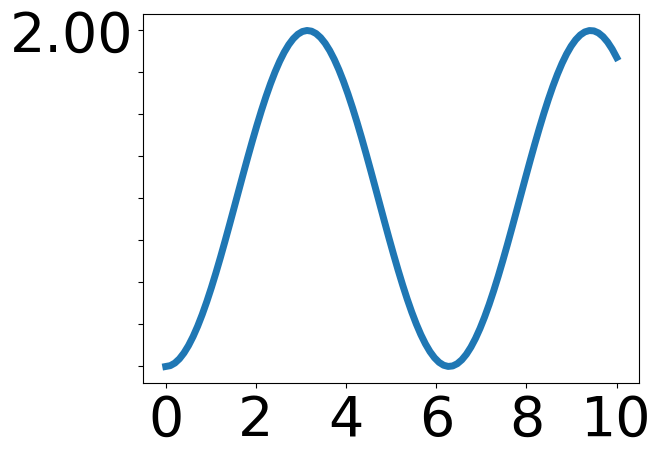

In [155]:
def plotPole(p, times=np.linspace(0, 10, 100)):
    font_size = 40
    if np.imag(p) > 0:
        new_p = -np.real(p)+0j +1j*np.imag(p)
        b_term = 2*np.real(new_p)
        c_term = new_p*np.conj(new_p)
        tf = control.TransferFunction([1], [1, b_term, c_term])
    else:
        tf = control.TransferFunction([1], [1, -p])
    uv = np.repeat(0, len(times))
    _, yv = control.step_response(tf, T=times)
    _, ax = plt.subplots(1)
    ax.plot(times, yv, linewidth=5)
    #ax.set_ylim([0, 5])
    xticklabels = ax.get_xticklabels()
    ax.set_xticklabels(xticklabels, size=font_size)
    yticklabels = ax.get_yticklabels()
    second_last = yticklabels[-2].get_text()
    [v.set_text('') for v in yticklabels]
    yticklabels[-2].set_text(second_last)
    ax.set_yticklabels(yticklabels, size=font_size)

# Tests
plotPole(0+1j)

/var/folders/02/lb248q1j50dch2pthzkvxmpr0000gn/T/ipykernel_14429/2597349886.py:16: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/02/lb248q1j50dch2pthzkvxmpr0000gn/T/ipykernel_14429/2597349886.py:21: UserWarning:

FixedFormatter should only be used together with FixedLocator



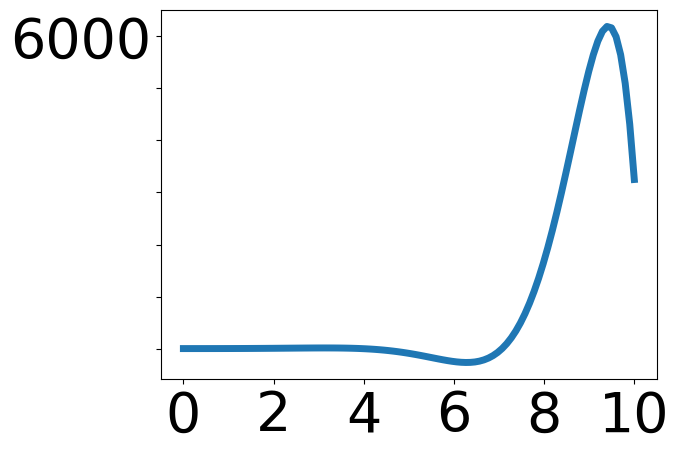

In [166]:
# Bug with negative imag?
#for p in [-1+1j, -1, -0.1, 0.1, 1, 0+1j, -0.4+1j]:
for p in [1+1j]:
    plotPole(p)

In [85]:
(1+1j)*(1-1j)

(2+0j)

# DC Gain

In [184]:
def plotResponse(pole):
    tf = control.TransferFunction([1], [1, -pole])
    times = np.linspace(0, 10, 100)
    uv = np.repeat(0, len(times))
    _, yv = control.step_response(tf, T=times)
    _ = plt.plot(range(len(yv)), yv)
    plt.xlabel("time")
    plt.ylabel("y(t)")
    plt.title(f"G(s)=1/(s+{-pole})", size=24)

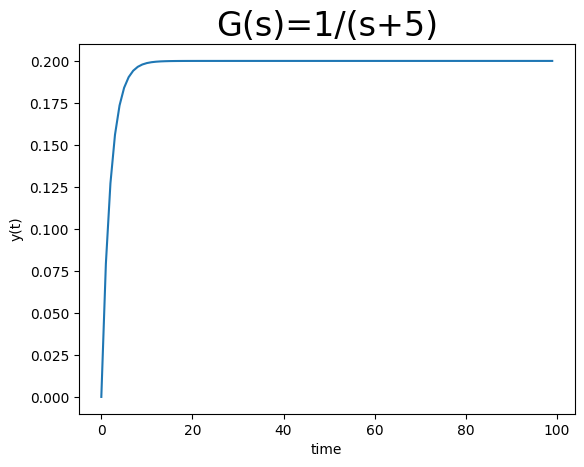

In [185]:
plotResponse(-5)

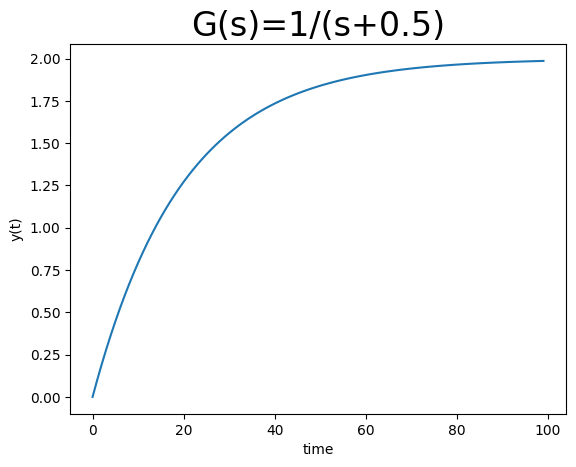

In [186]:
plotResponse(-0.5)

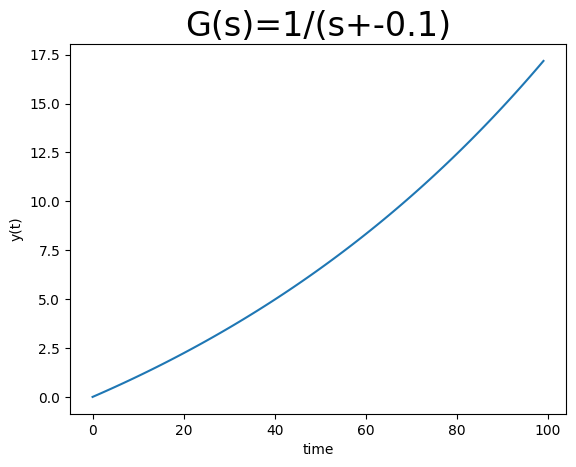

In [188]:
plotResponse(0.1)